In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

### Load the data

In [2]:
retail_xls = pd.ExcelFile('online_retail_II.xlsx')
print(retail_xls.sheet_names)

['Year 2009-2011', 'Year 2010-2011']


### Read the 2 sheets as separate dataframes

In [3]:
retail_1 = pd.read_excel('online_retail_II.xlsx', sheet_name='Year 2009-2011')
retail_2 = pd.read_excel('online_retail_II.xlsx', sheet_name='Year 2010-2011')

In [4]:
retail_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044848 entries, 0 to 1044847
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1044848 non-null  object        
 1   StockCode    1044848 non-null  object        
 2   Description  1040573 non-null  object        
 3   Quantity     1044848 non-null  int64         
 4   InvoiceDate  1044848 non-null  datetime64[ns]
 5   Price        1044848 non-null  float64       
 6   Customer ID  809561 non-null   float64       
 7   Country      1044848 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 63.8+ MB


In [5]:
retail_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      541910 non-null  object        
 1   StockCode    541910 non-null  object        
 2   Description  540456 non-null  object        
 3   Quantity     541910 non-null  int64         
 4   InvoiceDate  541910 non-null  datetime64[ns]
 5   Price        541910 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


#### In both dataframes, `Description` and `Customer ID` contain null values

In [6]:
retail_1.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
1,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
2,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
3,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
4,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom


In [7]:
retail_2.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [8]:
retail_1.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,1.044848e+06,1044848,1.044848e+06,809561.000000
mean,9.993649e+00,2011-01-03 11:44:15.916841728,4.590546e+00,15319.760422
min,-8.099500e+04,2009-12-01 07:45:00,-5.359436e+04,12346.000000
25%,1.000000e+00,2010-07-05 11:11:00,1.250000e+00,13969.000000
50%,3.000000e+00,2010-12-08 16:34:00,2.100000e+00,15248.000000
75%,1.000000e+01,2011-07-27 13:42:00,4.130000e+00,16792.000000
max,8.099500e+04,2011-12-09 12:50:00,3.897000e+04,18287.000000
std,1.742185e+02,NaN,1.217042e+02,1695.812057


In [9]:
retail_2.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,541910.000000,541910,541910.000000,406830.000000
mean,9.552234,2011-07-04 13:35:22.342307584,4.611138,15287.684160
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.080957,NaN,96.759765,1713.603074


### Prepare to export the dataframes to csv files for analysis in MySQL
#### Enforce each column's type for ease of use

In [10]:
retail_1 = retail_1.astype({
    'Invoice': 'string',
    'StockCode': 'string',
    'Description': 'string',
    'Quantity': 'int',
    'InvoiceDate': 'datetime64[ns]',
    'Price': 'float',
    'Customer ID': 'string', 
    'Country': 'string'
})

retail_2 = retail_2.astype({
    'Invoice': 'string',
    'StockCode': 'string',
    'Description': 'string',
    'Quantity': 'int',
    'InvoiceDate': 'datetime64[ns]',
    'Price': 'float',
    'Customer ID': 'string',
    'Country': 'string'
})

In [11]:
retail_1.to_csv('retail_1.csv', index=False, lineterminator='\n')
retail_2.to_csv('retail_2.csv', index=False, lineterminator='\n')

### Combine the 2 dataframes into 1

In [12]:
retail_df = pd.concat([retail_1, retail_2])

In [13]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1586758 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1586758 non-null  string        
 1   StockCode    1586758 non-null  string        
 2   Description  1581029 non-null  string        
 3   Quantity     1586758 non-null  int32         
 4   InvoiceDate  1586758 non-null  datetime64[ns]
 5   Price        1586758 non-null  float64       
 6   Customer ID  1216391 non-null  string        
 7   Country      1586758 non-null  string        
dtypes: datetime64[ns](1), float64(1), int32(1), string(5)
memory usage: 102.9 MB


<Axes: >

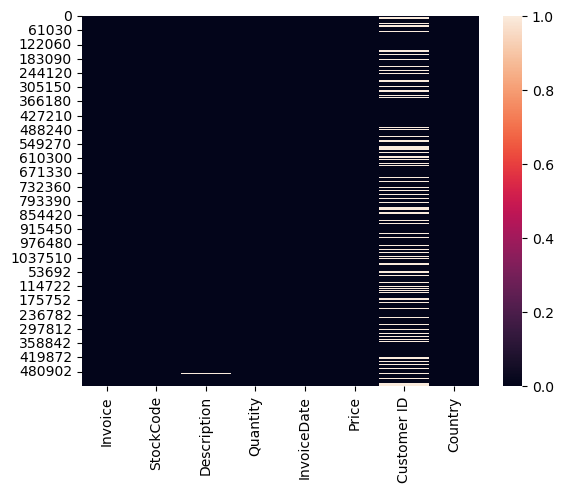

In [14]:
sns.heatmap(retail_df.isnull())

In [15]:
retail_df.columns[retail_df.isnull().any()]

Index(['Description', 'Customer ID'], dtype='object')

In [16]:
retail_df.describe()

,Quantity,InvoiceDate,Price
count,1.586758e+06,1586758,1.586758e+06
mean,9.842897e+00,2011-03-06 16:07:50.373880832,4.597579e+00
min,-8.099500e+04,2009-12-01 07:45:00,-5.359436e+04
25%,1.000000e+00,2010-10-17 13:59:00,1.250000e+00
50%,3.000000e+00,2011-04-04 15:18:00,2.100000e+00
75%,1.000000e+01,2011-09-15 16:37:00,4.130000e+00
max,8.099500e+04,2011-12-09 12:50:00,3.897000e+04
std,1.903384e+02,NaN,1.138016e+02


### Cleaning the data

#### Check `Customer ID` and `Description` for having null values

In [17]:
retail_df[retail_df['Customer ID'].isnull()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,<NA>,United Kingdom
280,489463,71477,short,-240,2009-12-01 10:52:00,0.00,<NA>,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,<NA>,United Kingdom
470,489521,21646,<NA>,-50,2009-12-01 11:44:00,0.00,<NA>,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,<NA>,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,<NA>,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,<NA>,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,<NA>,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,<NA>,United Kingdom


In [18]:
retail_df[retail_df['Description'].isnull()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
470,489521,21646,<NA>,-50,2009-12-01 11:44:00,0.0,<NA>,United Kingdom
3114,489655,20683,<NA>,-44,2009-12-01 17:26:00,0.0,<NA>,United Kingdom
3161,489659,21350,<NA>,230,2009-12-01 17:39:00,0.0,<NA>,United Kingdom
3753,489781,84292,<NA>,17,2009-12-02 11:45:00,0.0,<NA>,United Kingdom
4296,489806,18010,<NA>,-770,2009-12-02 12:42:00,0.0,<NA>,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,<NA>,-2,2011-12-07 18:26:00,0.0,<NA>,United Kingdom
535326,581203,23406,<NA>,15,2011-12-07 18:31:00,0.0,<NA>,United Kingdom
535332,581209,21620,<NA>,6,2011-12-07 18:35:00,0.0,<NA>,United Kingdom
536981,581234,72817,<NA>,27,2011-12-08 10:33:00,0.0,<NA>,United Kingdom


#### Here shown that there are a lot of `Quantity` with negative values, check on that as well

In [19]:
retail_df[retail_df['Quantity'] < 0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.25,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.85,16321.0,Australia
181,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
182,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


#### Many of the negative quantities have distinctive `Invoice`. From the UCI's website about `Invoice`: 
```
"If this code starts with the letter 'c', it indicates a cancellation."
```

#### Remove the rows where there are no `Customer ID` and those where `Quantity` is less than 1 to filter out freebies or cancelled/returned products

In [20]:
retail_df = retail_df[~retail_df['Customer ID'].isnull()]
retail_df = retail_df[retail_df['Quantity'] > 0]
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1189040 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1189040 non-null  string        
 1   StockCode    1189040 non-null  string        
 2   Description  1189040 non-null  string        
 3   Quantity     1189040 non-null  int32         
 4   InvoiceDate  1189040 non-null  datetime64[ns]
 5   Price        1189040 non-null  float64       
 6   Customer ID  1189040 non-null  string        
 7   Country      1189040 non-null  string        
dtypes: datetime64[ns](1), float64(1), int32(1), string(5)
memory usage: 77.1 MB


#### For `Description`, first strip the values for better string operations

In [21]:
retail_df['Description'] = retail_df['Description'].str.strip()

#### Since mostly `Description` values are written in all uppercase, try to isolate the ones written in lowercase

In [22]:
desc = list(set(retail_df['Description'].values))
lower_case_desc = [i for i in desc if not str(i).isupper()]
for i in lower_case_desc:
    print(i)

BAG 250g SWIRLY MARBLES
POLYESTER FILLER PAD 65CMx65CM
POLYESTER FILLER PAD 45x45cm
Adjustment by john on 26/01/2010 17
Bank Charges
Adjustment by john on 26/01/2010 16
BAG 125g SWIRLY MARBLES
SET Of 6 SOLDIER SKITTLES
3 TRADITIONAl BISCUIT CUTTERS  SET
This is a test product.
FRENCH BLUE METAL DOOR SIGN No
NUMBER TILE COTTAGE GARDEN, No
High Resolution Image
Next Day Carriage
Discount
FOLK ART GREETING CARD,pack/12
FRENCH BLUE METAL DOOR SIGN, No
NUMBER TILE VINTAGE FONT, No
POLYESTER FILLER PAD 30CMx30CM
POLYESTER FILLER PAD 40x40cm
THE KING GIFT BAG 25x24x12cm
NUMBER TILE VINTAGE FONT No
NUMBER TILE COTTAGE GARDEN No
Manual
POLYESTER FILLER PAD 45x30cm
BAG 500g SWIRLY MARBLES
Adjustment by Peter on Jun 25 2010
FLOWERS HANDBAG blue and orange
ESSENTIAL BALM 3.5g TIN IN ENVELOPE
POLYESTER FILLER PAD 60x40cm


#### Based on the result, `Description` values that contain the words `"test"`, `"adjustment"`, `"discount"`, or `"charges"` are to be excluded, since they don't indicate actual sales

In [23]:
exclude = ["test", "adjustment", "discount", "charges"]
skip = "|".join(exclude)

In [24]:
retail_df[retail_df['Description'].str.contains(skip, case=False)]['Description']

18465                Bank Charges
27994     This is a test product.
28252     This is a test product.
28254     This is a test product.
39398     This is a test product.
                   ...           
407618               Bank Charges
431363               Bank Charges
440745               Bank Charges
506357               Bank Charges
534008               Bank Charges
Name: Description, Length: 95, dtype: string

In [25]:
retail_df = retail_df[~retail_df['Description'].str.contains(skip, case=False)]
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1188945 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1188945 non-null  string        
 1   StockCode    1188945 non-null  string        
 2   Description  1188945 non-null  string        
 3   Quantity     1188945 non-null  int32         
 4   InvoiceDate  1188945 non-null  datetime64[ns]
 5   Price        1188945 non-null  float64       
 6   Customer ID  1188945 non-null  string        
 7   Country      1188945 non-null  string        
dtypes: datetime64[ns](1), float64(1), int32(1), string(5)
memory usage: 77.1 MB


#### For `StockCode`, remove those with `"POST"`, `"DOT"`, `"PADS"`, `"C2"`, or `"S"` since those are not directly purchased from the store

In [26]:
retail_df[retail_df['StockCode'].isin(['POST', 'DOT', 'PADS', 'C2', 'S'])]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
81,489439,POST,POSTAGE,3,2009-12-01 09:28:00,18.0,12682.0,France
126,489444,POST,POSTAGE,1,2009-12-01 09:55:00,141.0,12636.0,USA
173,489447,POST,POSTAGE,1,2009-12-01 10:10:00,130.0,12362.0,Belgium
597,489526,POST,POSTAGE,6,2009-12-01 11:50:00,18.0,12533.0,Germany
1231,489557,POST,POSTAGE,4,2009-12-01 12:52:00,18.0,12490.0,France
...,...,...,...,...,...,...,...,...
541216,581494,POST,POSTAGE,2,2011-12-09 10:13:00,18.0,12518.0,Germany
541730,581570,POST,POSTAGE,1,2011-12-09 11:59:00,18.0,12662.0,Germany
541767,581574,POST,POSTAGE,2,2011-12-09 12:09:00,18.0,12526.0,Germany
541768,581578,POST,POSTAGE,3,2011-12-09 12:16:00,18.0,12713.0,Germany


In [27]:
retail_df = retail_df[~retail_df['StockCode'].isin(['POST', 'DOT', 'PADS', 'C2', 'S'])]
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1185607 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1185607 non-null  string        
 1   StockCode    1185607 non-null  string        
 2   Description  1185607 non-null  string        
 3   Quantity     1185607 non-null  int32         
 4   InvoiceDate  1185607 non-null  datetime64[ns]
 5   Price        1185607 non-null  float64       
 6   Customer ID  1185607 non-null  string        
 7   Country      1185607 non-null  string        
dtypes: datetime64[ns](1), float64(1), int32(1), string(5)
memory usage: 76.9 MB


#### For `Price`, get rid of transactions with prices 0

In [28]:
retail_df[retail_df['Price'] == 0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
4671,489825,22076,6 RIBBONS EMPIRE,12,2009-12-02 13:34:00,0.0,16126.0,United Kingdom
6785,489998,48185,DOOR MAT FAIRY CAKE,2,2009-12-03 11:19:00,0.0,15658.0,United Kingdom
16124,490727,M,Manual,1,2009-12-07 16:38:00,0.0,17231.0,United Kingdom
18731,490961,22142,CHRISTMAS CRAFT WHITE FAIRY,12,2009-12-08 15:25:00,0.0,14108.0,United Kingdom
18732,490961,22065,CHRISTMAS PUDDING TRINKET POT,1,2009-12-08 15:25:00,0.0,14108.0,United Kingdom
...,...,...,...,...,...,...,...,...
479079,577129,22464,HANGING METAL HEART LANTERN,4,2011-11-17 19:52:00,0.0,15602.0,United Kingdom
479553,577168,M,Manual,1,2011-11-18 10:42:00,0.0,12603.0,Germany
480649,577314,23407,SET OF 2 TRAYS HOME SWEET HOME,2,2011-11-18 13:23:00,0.0,12444.0,Norway
485985,577696,M,Manual,1,2011-11-21 11:57:00,0.0,16406.0,United Kingdom


In [29]:
retail_df = retail_df[retail_df['Price'] > 0]
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1185501 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1185501 non-null  string        
 1   StockCode    1185501 non-null  string        
 2   Description  1185501 non-null  string        
 3   Quantity     1185501 non-null  int32         
 4   InvoiceDate  1185501 non-null  datetime64[ns]
 5   Price        1185501 non-null  float64       
 6   Customer ID  1185501 non-null  string        
 7   Country      1185501 non-null  string        
dtypes: datetime64[ns](1), float64(1), int32(1), string(5)
memory usage: 76.9 MB


### RFM Analysis

#### From Wikipedia (https://en.wikipedia.org/wiki/RFM_(market_research): 
```
RFM is a method used for analyzing customer value and segmenting customers which is commonly used in database marketing and direct marketing. It has received particular attention in the retail and professional services industries.

RFM stands for the three dimensions:

    Recency – How recently did the customer purchase?
    Frequency – How often do they purchase?
    Monetary Value – How much do they spend?
```

#### First, group the dataframe based on the Customer ID, and get the last purchase date of each

In [30]:
rfm_df = retail_df.groupby(['Customer ID'], as_index=False)['InvoiceDate'].max()
rfm_df

,Customer ID,InvoiceDate
0,12346.0,2011-01-18 10:01:00
1,12347.0,2011-12-07 15:52:00
2,12348.0,2011-09-25 13:13:00
3,12349.0,2011-11-21 09:51:00
4,12350.0,2011-02-02 16:01:00
...,...,...
5863,18283.0,2011-12-06 12:02:00
5864,18284.0,2010-10-04 11:33:00
5865,18285.0,2010-02-17 10:24:00
5866,18286.0,2010-08-20 11:57:00


#### Recency

#### To calculate Recency, get the last invoice recorded in the dataframe

In [31]:
last_ever = max(retail_df['InvoiceDate'])
print(last_ever)

2011-12-09 12:50:00


#### Get Recency values by substracting the last purchase in the whole dataframe to each of the Customer's last purchase, shown in days

In [32]:
rfm_df['Recency'] = (last_ever - rfm_df['InvoiceDate']).dt.days
rfm_df

,Customer ID,InvoiceDate,Recency
0,12346.0,2011-01-18 10:01:00,325
1,12347.0,2011-12-07 15:52:00,1
2,12348.0,2011-09-25 13:13:00,74
3,12349.0,2011-11-21 09:51:00,18
4,12350.0,2011-02-02 16:01:00,309
...,...,...,...
5863,18283.0,2011-12-06 12:02:00,3
5864,18284.0,2010-10-04 11:33:00,431
5865,18285.0,2010-02-17 10:24:00,660
5866,18286.0,2010-08-20 11:57:00,476


#### Customer `12346` hasn't gone shopping for 325 days while it has only been 3 days for customer `18283`. Both are counted from the last recorded purchase date, `2011-12-09 12:50:00`

#### Frequency

#### Frequency is calculated by counting the unique `Invoice` occurred by each customer throughout the data period, meaning getting each different time a transaction has been made

In [33]:
rfm_df['Frequency'] = retail_df.groupby(by='Customer ID', as_index=False)['Invoice'].nunique()['Invoice']
rfm_df

,Customer ID,InvoiceDate,Recency,Frequency
0,12346.0,2011-01-18 10:01:00,325,3
1,12347.0,2011-12-07 15:52:00,1,8
2,12348.0,2011-09-25 13:13:00,74,5
3,12349.0,2011-11-21 09:51:00,18,3
4,12350.0,2011-02-02 16:01:00,309,1
...,...,...,...,...
5863,18283.0,2011-12-06 12:02:00,3,22
5864,18284.0,2010-10-04 11:33:00,431,1
5865,18285.0,2010-02-17 10:24:00,660,1
5866,18286.0,2010-08-20 11:57:00,476,2


#### Monetary

#### From the original dataframe, first calculate how much a customer paid for each type of items in a new column, by multiplying `Quantity` with `Price`.
#### Then, sum all the purchases for each customer

In [34]:
retail_df['Purchase'] = retail_df['Quantity'] * retail_df['Price']
retail_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Purchase
0,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
1,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40
2,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom,59.50
3,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
4,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom,39.60
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [35]:
rfm_df['Monetary'] = retail_df.groupby(by='Customer ID', as_index=False)['Purchase'].sum()['Purchase']
rfm_df = rfm_df[['Customer ID', 'Recency', 'Frequency', 'Monetary']]
rfm_df

,Customer ID,Recency,Frequency,Monetary
0,12346.0,325,3,154536.56
1,12347.0,1,8,9231.53
2,12348.0,74,5,3095.64
3,12349.0,18,3,5136.24
4,12350.0,309,1,588.80
...,...,...,...,...
5863,18283.0,3,22,4831.53
5864,18284.0,431,1,411.68
5865,18285.0,660,1,377.00
5866,18286.0,476,2,1246.43


#### After all RFM values are calculated, now rank each of the column.
#### For `Recency`, the lower the value, the more recent they shop, the better, while for `Frequency` and `Monetary`, the bigger the value is the better. Therefore, `Recency` is ranked ascending while the other two are in descending order. All is given rank in percentage using `average` method (the default). This way, the average value is given as the rank for customers having same values.

In [36]:
rfm_df['Recency Rank'] = rfm_df['Recency'].rank(ascending=True, pct=True)
rfm_df['Frequency Rank'] = rfm_df['Frequency'].rank(ascending=False, pct=True)
rfm_df['Monetary Rank'] = rfm_df['Monetary'].rank(ascending=False, pct=True)

In [37]:
rfm_df

,Customer ID,Recency,Frequency,Monetary,Recency Rank,Frequency Rank,Monetary Rank
0,12346.0,325,3,154536.56,0.711997,0.505879,0.002727
1,12347.0,1,8,9231.53,0.023262,0.206033,0.084526
2,12348.0,74,5,3095.64,0.457566,0.336401,0.269939
3,12349.0,18,3,5136.24,0.197001,0.505879,0.168200
4,12350.0,309,1,588.80,0.699983,0.861708,0.706544
...,...,...,...,...,...,...,...
5863,18283.0,3,22,4831.53,0.055044,0.044990,0.179789
5864,18284.0,431,1,411.68,0.834015,0.861708,0.779312
5865,18285.0,660,1,377.00,0.969155,0.861708,0.799080
5866,18286.0,476,2,1246.43,0.870569,0.643149,0.507498


#### Customer `12347` has a 1 Recency, 8 Frequency, and 9231.53 in Monetary (in Poundsterling). Their ranks are shown to have very small numbers, meaning they could be one of the top customers

#### After ranking the 3 values, assign scores according to their quartiles. If the rank is lower than the lower quartile (Q1), they get a score of 4. If the rank is in between the lower (Q1) and middle (Q2) quartiles, the score is 3, and so on.

In [38]:
f75 = rfm_df['Frequency Rank'].quantile(q=0.75)
f50 = rfm_df['Frequency Rank'].quantile(q=0.5)
f25 = rfm_df['Frequency Rank'].quantile(q=0.25)

m75 = rfm_df['Monetary Rank'].quantile(q=0.75)
m50 = rfm_df['Monetary Rank'].quantile(q=0.5)
m25 = rfm_df['Monetary Rank'].quantile(q=0.25)

r75 = rfm_df['Recency Rank'].quantile(q=0.75)
r50 = rfm_df['Recency Rank'].quantile(q=0.5)
r25 = rfm_df['Recency Rank'].quantile(q=0.25)

In [25]:
print("r25", r25)
print("r50", r50)
print("r75", r75)
print("f25", f25)
print("f50", f50)
print("f75", f75)
print("m25", m25)
print("m50", m50)
print("m75", m75)

r25 0.2534935241990457
r50 0.5011929107021131
r75 0.7488070892978869
f25 0.2392638036809816
f50 0.505879345603272
f75 0.8617075664621677
m25 0.2501278118609407
m50 0.5000852079072937
m75 0.7500426039536469


In [40]:
def R_Score(row):
    if row['Recency Rank'] <= r25:
        return 4
    elif row['Recency Rank'] <= r50:
        return 3
    elif row['Recency Rank'] <= r75:
        return 2
    else:
        return 1

def F_Score(row):
    if row['Frequency Rank'] <= f25:
        return 4
    elif row['Frequency Rank'] <= f50:
        return 3
    elif row['Frequency Rank'] <= f75:
        return 2
    else:
        return 1

def M_Score(row):
    if row['Monetary Rank'] <= m25:
        return 4
    elif row['Monetary Rank'] <= m50:
        return 3
    elif row['Monetary Rank'] <= m75:
        return 2
    else:
        return 1

In [41]:
rfm_df['R_Score'] = rfm_df.apply(R_Score, axis=1)
rfm_df['F_Score'] = rfm_df.apply(F_Score, axis=1)
rfm_df['M_Score'] = rfm_df.apply(M_Score, axis=1)
rfm_df

,Customer ID,Recency,Frequency,Monetary,Recency Rank,Frequency Rank,Monetary Rank,R_Score,F_Score,M_Score
0,12346.0,325,3,154536.56,0.711997,0.505879,0.002727,2,3,4
1,12347.0,1,8,9231.53,0.023262,0.206033,0.084526,4,4,4
2,12348.0,74,5,3095.64,0.457566,0.336401,0.269939,3,3,3
3,12349.0,18,3,5136.24,0.197001,0.505879,0.168200,4,3,4
4,12350.0,309,1,588.80,0.699983,0.861708,0.706544,2,2,2
...,...,...,...,...,...,...,...,...,...,...
5863,18283.0,3,22,4831.53,0.055044,0.044990,0.179789,4,4,4
5864,18284.0,431,1,411.68,0.834015,0.861708,0.779312,1,2,1
5865,18285.0,660,1,377.00,0.969155,0.861708,0.799080,1,2,1
5866,18286.0,476,2,1246.43,0.870569,0.643149,0.507498,1,2,2


In [42]:
rfm_df['RFM_Score'] = rfm_df['R_Score'].astype(str) + rfm_df['F_Score'].astype(str) + rfm_df['M_Score'].astype(str)
rfm_df['RFM_Score'] = rfm_df['RFM_Score'].astype(int)
rfm_df

,Customer ID,Recency,Frequency,Monetary,Recency Rank,Frequency Rank,Monetary Rank,R_Score,F_Score,M_Score,RFM_Score
0,12346.0,325,3,154536.56,0.711997,0.505879,0.002727,2,3,4,234
1,12347.0,1,8,9231.53,0.023262,0.206033,0.084526,4,4,4,444
2,12348.0,74,5,3095.64,0.457566,0.336401,0.269939,3,3,3,333
3,12349.0,18,3,5136.24,0.197001,0.505879,0.168200,4,3,4,434
4,12350.0,309,1,588.80,0.699983,0.861708,0.706544,2,2,2,222
...,...,...,...,...,...,...,...,...,...,...,...
5863,18283.0,3,22,4831.53,0.055044,0.044990,0.179789,4,4,4,444
5864,18284.0,431,1,411.68,0.834015,0.861708,0.779312,1,2,1,121
5865,18285.0,660,1,377.00,0.969155,0.861708,0.799080,1,2,1,121
5866,18286.0,476,2,1246.43,0.870569,0.643149,0.507498,1,2,2,122


#### Assign the customers to 7 segments based on their scores. Customers in "Loyal Customer" or "Champion" segments are the ones who keep coming back to shop at the store, while those "New Customer" and "At Risk" might need to be giving more promotional codes, marketing news, and so on to make them shop more at the store

In [43]:
def segment_customer(row):
    if row['RFM_Score'] == 444:
        return 'Champion'
    elif row['F_Score'] >= 3 and row['M_Score'] >= 3:
        return 'Loyal Customer'
    elif row['R_Score'] <= 2 and row['F_Score'] >= 3:
        return 'Potential Loyalist'
    elif row['R_Score'] == 1 and row['F_Score'] == 1 and row['M_Score'] >= 3:
        return 'New Customer'
    elif row['R_Score'] >= 3 and row['F_Score'] >= 2:
        return 'At Risk'
    elif row['R_Score'] == 1 and row['F_Score'] == 1 and row['M_Score'] == 1:
        return 'Lost Customer'
    else:
        return 'Others'

In [44]:
rfm_df['segment'] = rfm_df.apply(segment_customer, axis=1)
rfm_df

,Customer ID,Recency,Frequency,Monetary,Recency Rank,Frequency Rank,Monetary Rank,R_Score,F_Score,M_Score,RFM_Score,segment
0,12346.0,325,3,154536.56,0.711997,0.505879,0.002727,2,3,4,234,Loyal Customer
1,12347.0,1,8,9231.53,0.023262,0.206033,0.084526,4,4,4,444,Champion
2,12348.0,74,5,3095.64,0.457566,0.336401,0.269939,3,3,3,333,Loyal Customer
3,12349.0,18,3,5136.24,0.197001,0.505879,0.168200,4,3,4,434,Loyal Customer
4,12350.0,309,1,588.80,0.699983,0.861708,0.706544,2,2,2,222,Others
...,...,...,...,...,...,...,...,...,...,...,...,...
5863,18283.0,3,22,4831.53,0.055044,0.044990,0.179789,4,4,4,444,Champion
5864,18284.0,431,1,411.68,0.834015,0.861708,0.779312,1,2,1,121,Others
5865,18285.0,660,1,377.00,0.969155,0.861708,0.799080,1,2,1,121,Others
5866,18286.0,476,2,1246.43,0.870569,0.643149,0.507498,1,2,2,122,Others


#### Count the segmentations

In [45]:
rfm_segment = rfm_df.groupby(by='segment', as_index=False).size()
rfm_segment

,segment,size
0,At Risk,978
1,Champion,683
2,Loyal Customer,1937
3,Others,1842
4,Potential Loyalist,428


#### Get the RFM analysis results from MySQL to compare

In [46]:
segment_mysql = pd.read_csv('segment_mysql.csv')
segment_mysql

,cust_segmentation,count
0,Lost Customer,736
1,Others,1463
2,At Risk,855
3,Potential Loyalist,356
4,Loyal Customer,1775
5,New Customer,18
6,Champion,665


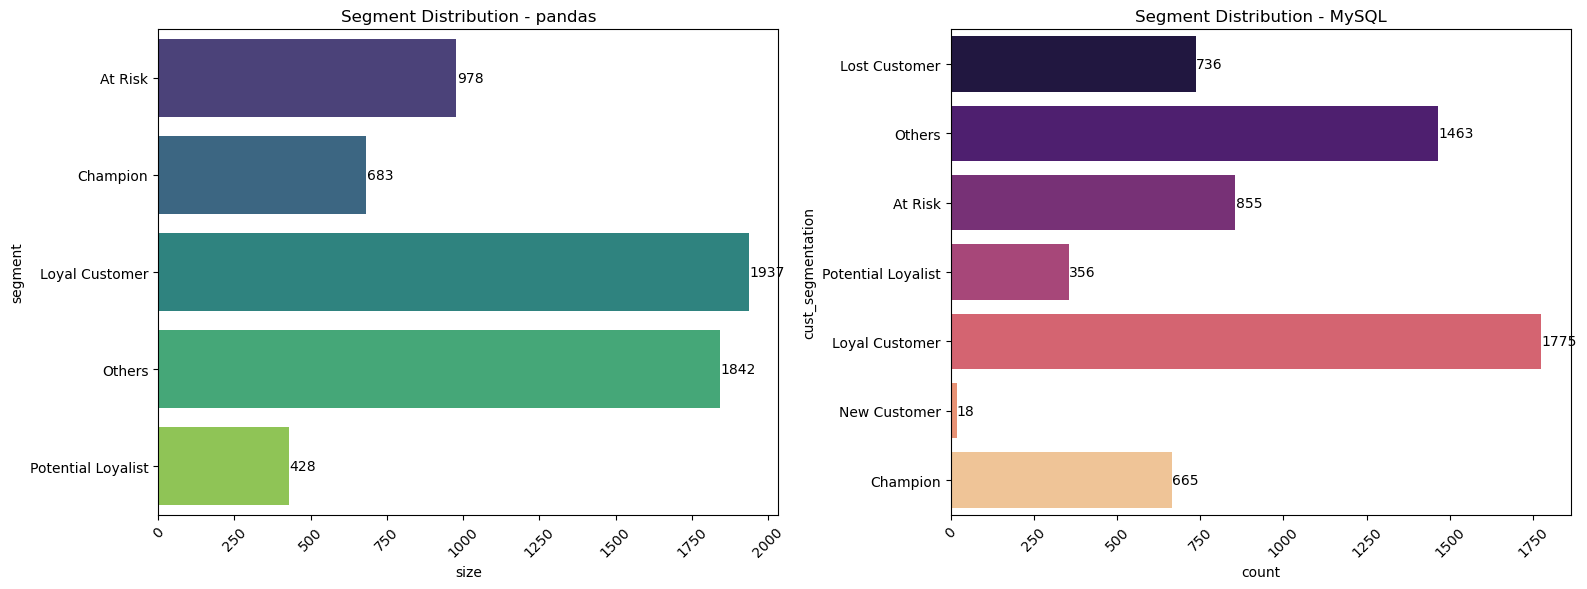

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns

# First plot
sns.barplot(data=rfm_segment, ax=axes[0], x="size", y="segment", hue="segment", dodge=False, palette='viridis')
axes[0].set_title('Segment Distribution - pandas')
axes[0].tick_params(axis='x', rotation=45)

for index, row in rfm_segment.iterrows():
    axes[0].text(row["size"] + 1, index, str(row["size"]), va='center', fontsize=10)

# Second plot
sns.barplot(data=segment_mysql, ax=axes[1], x="count", y="cust_segmentation", hue="cust_segmentation", dodge=False, palette='magma')
axes[1].set_title('Segment Distribution - MySQL')
axes[1].tick_params(axis='x', rotation=45)

for index, row in segment_mysql.iterrows():
    axes[1].text(row["count"] + 1, index, str(row["count"]), va='center', fontsize=10)

plt.tight_layout()
plt.show()

#### We can see there are some differences between the results. Particularly, RFM Analysis in MySQL has successfully captured customers belonging in "New Customer" segment while the one in Python didn't. This may have been due to the different formulations between the two languages. While both rankings are done using similar functions, `rank(method='average', pct=True` in pandas and `PERCENT_RANK` in MySQL, the values are assigned different ranks. Pandas gives the percentile based on the rank divided by the total number of rows; the highest value can receive a rank of 1.0, especially if there are no ties. MySQL's PERCENT_RANK() uses the formula (rank - 1) / (total - 1), which means the highest value always gets 1, but the lowest value will always be 0 — ensuring the range strictly spans from 0 to 1, unlike pandas where the minimum rank is slightly above 0.